<a href="https://colab.research.google.com/github/mahesh-ml/MLBasics/blob/main/outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.datasets import load_boston

In [27]:
boston_datasets = load_boston()

boston = pd.DataFrame(boston_datasets.data, columns = boston_datasets.feature_names)[['RM','LSTAT','CRIM']]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [28]:
boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [29]:
#function to plot histogram, Q-Q plot and boxplot
def diagnostic_plot(df, variable):

  plt.figure(figsize=(16,4))

  #histogram
  plt.subplot(1,3,1)
  sns.distplot(df[variable], bins=30)
  plt.title('Histogram')

  # Q-Q plot
  plt.subplot(1,3,2)
  stats.probplot(df[variable],dist='norm', plot=plt)
  plt.ylabel('RM Quantities')

  #boxplot
  plt.subplot(1,3,3)
  plt.boxplot(df[variable])
  plt.title('Box plot')

  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


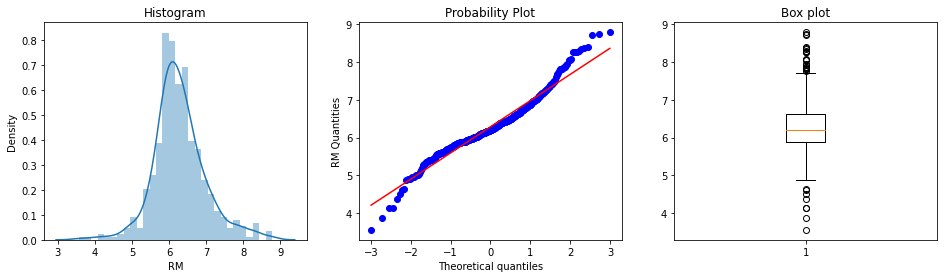

In [30]:
diagnostic_plot(boston, 'RM')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


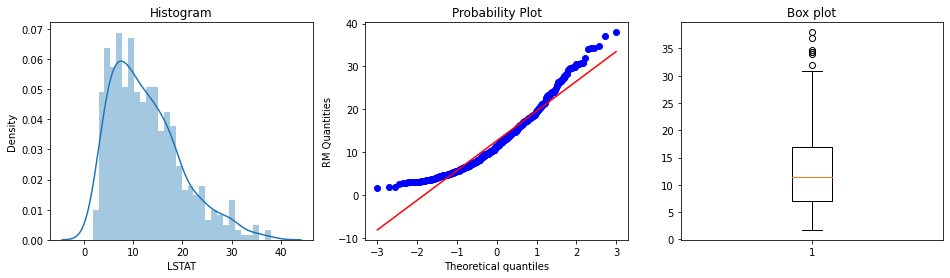

In [31]:
diagnostic_plot(boston, 'LSTAT')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


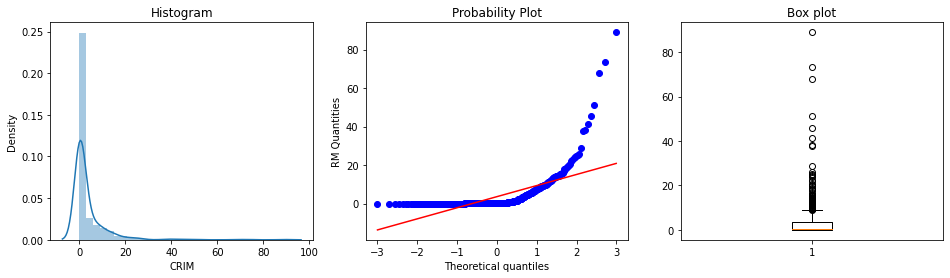

In [32]:
diagnostic_plot(boston, 'CRIM')

In [33]:
#find lower and upper boundaries
def find_skewed_boundaries(df, variable, distance):

  IQR = df[variable].quantile(0.75)- df[variable].quantile(0.25)
  lower_boundary = df[variable].quantile(0.25) - ( IQR*distance)
  upper_boundary = df[variable].quantile(0.25) + ( IQR*distance)

  return lower_boundary, upper_boundary

In [34]:
RM_upper_limit , RM_lower_limit = find_skewed_boundaries(boston, 'RM', 1.5)
RM_upper_limit , RM_lower_limit

(4.778500000000001, 6.9925)

In [35]:
LSTAT_upper_limit , LSTAT_lower_limit = find_skewed_boundaries(boston, 'LSTAT', 1.5)
LSTAT_upper_limit , LSTAT_lower_limit

(-8.057500000000005, 21.957500000000003)

In [36]:
CRIM_upper_limit , CRIM_lower_limit = find_skewed_boundaries(boston, 'CRIM', 1.5)
CRIM_upper_limit , CRIM_lower_limit

(-5.31051125, 5.47460125)

In [48]:
#lets flag the outlier now
outliers_RM = np.where(boston['LSTAT'] > LSTAT_upper_limit , True , np.where(boston['LSTAT']< LSTAT_lower_limit , True, False))

In [49]:
outliers_LSTAT = np.where(boston['LSTAT'] > LSTAT_upper_limit , True , np.where(boston['LSTAT']< LSTAT_lower_limit , True, False))

In [50]:
outliers_CRIM = np.where(boston['CRIM'] > CRIM_upper_limit , True , np.where(boston['CRIM']< CRIM_lower_limit , True, False))

In [51]:
#Now remove the outliers

boston_trimmed  = boston.loc[~(outliers_RM + outliers_LSTAT + outliers_CRIM), ]

In [52]:
boston.shape, boston_trimmed.shape

((506, 3), (0, 3))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


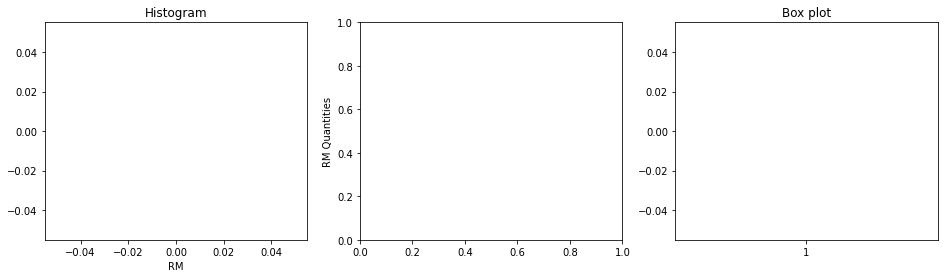

In [43]:
#diagnostic plots
diagnostic_plot(boston_trimmed, 'RM')